# California Income Tax Data Analysis: 2007-2014
Through analysis of changing proportions of income brackets, we will identify regions with populations trending towards higher income levels. Under the assumption that these trends will continue, we can expect housing prices to increase in these regions relatively more than in regions which lack these significant trends. It is important to note that we should only hold this assumption of future trends under the confirming conclusions of forecasting analysis. (This will be contained in a separate Notebook.) 

  * Cells represent the number of tax returns for an income bracket within a zipcode
  * Columns represents data from separate years


We will limit our analysis to income brackets which can be reasonably assumed to reflect demand in the housing market; thus, our proportions are not the total proportions over these regions, but are the proportions over the housing market's participants (i.e. earning over $25,000 annually).

Income Brackets:
  * 1: \$25,000 - \$50,000 
  * 2: \$50,000 - \$75,000 
  * 3: \$75,000 - \$100,000 
  * 4: \$100,000 - \$200,000 
  * 5: \$200,000 + 

The median income in California is about $61,000, so we will be particularly interested in increases in the three highest income brackets as well as decreases in the lowest two income brackets. However, as an example, an increase in the second income bracket for a region which historically has a high proportion of lowest-bracket earners could indicate a shift towards higher earners.

### Questions we will be exploring:

  * Where is income distribution shifting the most towards higher brackets?
  * Within a region, how has each bracket changed over time?
  * Can we expect these trends to continue? 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os.path 
import math
import seaborn as sns

%matplotlib inline

In [4]:
# remove the lowest income bracket: they are not participants in the housing market
ca_tax = pd.read_csv(os.getcwd()+'\data_clean\ca tax returns.csv')
ca_tax['zipcode'] = ca_tax['zipcode'].astype(str)
ca_tax = ca_tax[ca_tax['gross_income_bracket']!='0: < 25,000']
ca_tax = ca_tax.set_index(['zipcode','gross_income_bracket'])

ca_tax.head(10)

tax_returns_2007  tax_returns_2008  \
zipcode gross_income_bracket                                       
0       1: 25,000-50,000             3834467.0         3777895.0   
        2: 50,000-75,000             2129615.0         2114223.0   
        3: 75,000-100,000            1310319.0         1313113.0   
        4: 100,000-200,000           1794378.0         1829708.0   
        5: > 200,000                  680811.0          641762.0   
90001   1: 25,000-50,000                5549.0            5672.0   
        2: 50,000-75,000                1221.0            1221.0   
        3: 75,000-100,000                266.0             303.0   
        4: 100,000-200,000                75.0             101.0   
        5: > 200,000                      17.0              11.0   

                              tax_returns_2009  tax_returns_2010  \
zipcode gross_income_bracket                                       
0       1: 25,000-50,000             3744118.0         3795875.0   
        2: 50,000-75,000             2047609.0         2071618.0   
        3: 75,000-100,000            1269016.0         1284362.0   
        4: 100,000-200,000           1770054.0         1801455.0   
        5: > 200,000                  581847.0          636198.0   
90001   1: 25,000-50,000                5499.0            5539.0   
        2: 50,000-75,000                1203.0            1251.0   
        3: 75,000-100,000                287.0             299.0   
        4: 100,000-200,000               105.0             108.0   
        5: > 200,000                       0.0               0.0   

                              tax_returns_2011  tax_returns_2012  \
zipcode gross_income_bracket                                       
0       1: 25,000-50,000             3907930.0         3851420.0   
        2: 50,000-75,000             2152410.0         2145000.0   
        3: 75,000-100,000            1345012.0         1361280.0   
        4: 100,000-200,000           1913458.0         2005070.0   
        5: > 200,000                  717341.0          799120.0   
90001   1: 25,000-50,000                5757.0            5700.0   
        2: 50,000-75,000                1362.0            1420.0   
        3: 75,000-100,000                319.0             340.0   
        4: 100,000-200,000               117.0             130.0   
        5: > 200,000                       0.0               0.0   

                              tax_returns_2013  tax_returns_2014  
zipcode gross_income_bracket                                      
0       1: 25,000-50,000             3916770.0         3965570.0  
        2: 50,000-75,000             2175060.0         2207030.0  
        3: 75,000-100,000            1385750.0         1411040.0  
        4: 100,000-200,000           2104210.0         2214810.0  
        5: > 200,000                  868510.0          978490.0  
90001   1: 25,000-50,000                5900.0            6110.0  
        2: 50,000-75,000                1480.0            1630.0  
        3: 75,000-100,000                330.0             420.0  
        4: 100,000-200,000               160.0             170.0  
        5: > 200,000                       0.0              20.0

In [5]:
# normalizing the data set so the cells are proportions of the total in that region, for the given year
zipcodes = ca_tax.index.levels[0]
ca_tax_normalized = ca_tax
for zc in zipcodes:
    for col in ca_tax.columns:
        ca_tax_normalized.loc[zc][col] = ca_tax.loc[zc][col]/ca_tax.loc[zc][col].sum()
        
ca_tax_normalized.head(10)

tax_returns_2007  tax_returns_2008  \
zipcode gross_income_bracket                                       
0       1: 25,000-50,000              0.393295          0.390411   
        2: 50,000-75,000              0.218431          0.218486   
        3: 75,000-100,000             0.134397          0.135698   
        4: 100,000-200,000            0.184047          0.189084   
        5: > 200,000                  0.069830          0.066320   
90001   1: 25,000-50,000              0.778479          0.776136   
        2: 50,000-75,000              0.171296          0.167077   
        3: 75,000-100,000             0.037318          0.041461   
        4: 100,000-200,000            0.010522          0.013820   
        5: > 200,000                  0.002385          0.001505   

                              tax_returns_2009  tax_returns_2010  \
zipcode gross_income_bracket                                       
0       1: 25,000-50,000              0.397775          0.395836   
        2: 50,000-75,000              0.217538          0.216030   
        3: 75,000-100,000             0.134820          0.133934   
        4: 100,000-200,000            0.188051          0.187857   
        5: > 200,000                  0.061815          0.066343   
90001   1: 25,000-50,000              0.775162          0.769626   
        2: 50,000-75,000              0.169580          0.173822   
        3: 75,000-100,000             0.040457          0.041545   
        4: 100,000-200,000            0.014801          0.015006   
        5: > 200,000                  0.000000          0.000000   

                              tax_returns_2011  tax_returns_2012  \
zipcode gross_income_bracket                                       
0       1: 25,000-50,000              0.389385          0.379006   
        2: 50,000-75,000              0.214466          0.211083   
        3: 75,000-100,000             0.134017          0.133959   
        4: 100,000-200,000            0.190657          0.197313   
        5: > 200,000                  0.071476          0.078639   
90001   1: 25,000-50,000              0.762012          0.750988   
        2: 50,000-75,000              0.180278          0.187088   
        3: 75,000-100,000             0.042224          0.044796   
        4: 100,000-200,000            0.015486          0.017128   
        5: > 200,000                  0.000000          0.000000   

                              tax_returns_2013  tax_returns_2014  
zipcode gross_income_bracket                                      
0       1: 25,000-50,000              0.374800          0.367968  
        2: 50,000-75,000              0.208134          0.204792  
        3: 75,000-100,000             0.132604          0.130931  
        4: 100,000-200,000            0.201354          0.205514  
        5: > 200,000                  0.083109          0.090795  
90001   1: 25,000-50,000              0.749682          0.731737  
        2: 50,000-75,000              0.188056          0.195210  
        3: 75,000-100,000             0.041931          0.050299  
        4: 100,000-200,000            0.020330          0.020359  
        5: > 200,000                  0.000000          0.002395

In [6]:
# relabel columns for clarity
relabel = {}
for col in ca_tax_normalized.columns:
    relabel[col] = col + '_%'
    
ca_tax_normalized = ca_tax_normalized.rename(columns=relabel)
ca_tax_normalized = ca_tax_normalized*100

## Preview of Analysis
We can measure changes in income distribution with respect to changes over geographic locations as well as with respect to changes over time. The first level of our analysis will be over differences in location; the second level of analysis (within each region) will be with respect to differences over time. 

### Part I: Geographic Analysis: relative to a fixed point in time
As an introduction to this analysis, we will first observe the approach to measuring differences between locations.

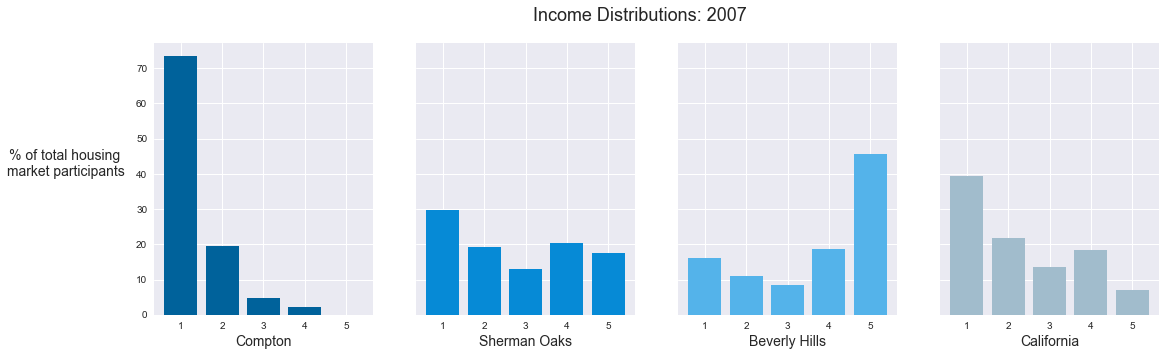

In [7]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True,figsize=(18,5))

ax1.bar([1,2,3,4,5],ca_tax_normalized.loc['90059']['tax_returns_2007_%'],facecolor='#00629B')
ax1.set_xlabel('Compton',fontsize=14)
ax1.set_ylabel('% of total housing \nmarket participants',rotation=0,labelpad=70,fontsize=14)

ax2.bar([1,2,3,4,5],ca_tax_normalized.loc['91403']['tax_returns_2007_%'],facecolor='#068AD6')
ax2.set_xlabel('Sherman Oaks',fontsize=14)

ax3.bar([1,2,3,4,5],ca_tax_normalized.loc['90210']['tax_returns_2007_%'],facecolor='#54B3EA')
ax3.set_xlabel('Beverly Hills',fontsize=14)

ax4.bar([1,2,3,4,5],ca_tax_normalized.loc['0']['tax_returns_2007_%'],facecolor='#A1BCCC')
ax4.set_xlabel('California',fontsize=14)

plt.suptitle('Income Distributions: 2007',fontsize=18)
#text = '1: \$25,000 - \$50,000\n2: \$50,000 - \$75,000\n3: \$75,000 - \$100,000\n4: \$100,000 - \$200,000\n5: \$200,000 +'
#props = dict(boxstyle='round', facecolor='#ffffff', alpha=0.5)
#ax4.text(0.42, 0.95, text, transform=ax4.transAxes, fontsize=11,
#        verticalalignment='top', bbox=props)

The first three plots vary from least affluent to most affluent region; the right-most plot represents California's average. Using California's average as a standard to measure against, we can identify what class of housing we would be investing in and if growth levels seem sustainable. (We define 'growth' here as the population's income distribution shifting towards the upper brackets--this will be measured with respect to changes in time and is not observable in these plots.)

Within the left three plots, there is a clear shift in density from the left-most column towards the right-most column as we compare the plots, i.e. a single investment in Compton will likely be at a lower price point than a single investment in Beverly Hills. Although investment is primarily a question of growing assets over time, it is also important to be aware exactly _what_ we are investing in at any point in time.

_Note: these distributions do not represent the entirety of each listed region. They represent zipcodes selected within each region._

Income Brackets:
  * 1: \$25,000 - \$50,000 
  * 2: \$50,000 - \$75,000 
  * 3: \$75,000 - \$100,000 
  * 4: \$100,000 - \$200,000 
  * 5: \$200,000 + 
  

### Part II: Temporal Analysis: relative to a fixed location
Within a given location, we can separate the income brackets and analyze changes over time.

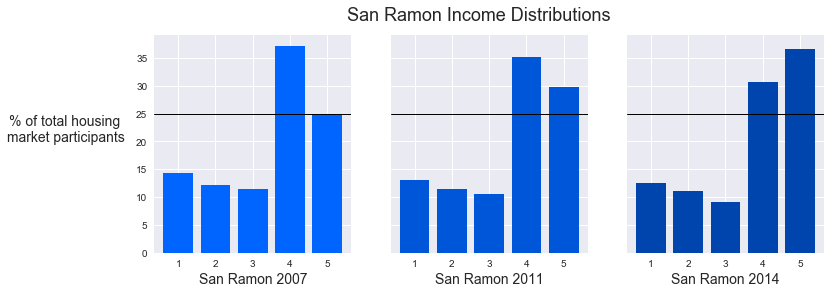

In [8]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(12,4))
ax1.bar([1,2,3,4,5],ca_tax_normalized.loc['94582']['tax_returns_2007_%'],facecolor='#0065ff')
ax1.set_ylabel('% of total housing \nmarket participants',rotation=0,labelpad=70,fontsize=14)
ax1.set_xlabel('San Ramon 2007',fontsize=14)
ax1.axhline(y=ca_tax_normalized.loc['94582'].loc['5: > 200,000']['tax_returns_2007_%'], xmin=0, xmax=5, linewidth=1, color = 'k')

ax2.bar([1,2,3,4,5],ca_tax_normalized.loc['94582']['tax_returns_2011_%'],facecolor='#0056d8')
ax2.set_xlabel('San Ramon 2011',fontsize=14)
ax2.axhline(y=ca_tax_normalized.loc['94582'].loc['5: > 200,000']['tax_returns_2007_%'], xmin=0, xmax=5, linewidth=1, color = 'k')

ax3.bar([1,2,3,4,5],ca_tax_normalized.loc['94582']['tax_returns_2014_%'],facecolor='#0044ad')
ax3.set_xlabel('San Ramon 2014',fontsize=14)
ax3.axhline(y=ca_tax_normalized.loc['94582'].loc['5: > 200,000']['tax_returns_2007_%'], xmin=0, xmax=5, linewidth=1, color = 'k')

plt.suptitle('San Ramon Income Distributions',fontsize=18)

Notice the increase in proportion of earners who make more than $200,000 (column 5) from 2007 to 2014 as well as the gradual decrease in the lower income brackets. We can analyze each of the income brackets separately, looking for decreases in the lower brackets and increases in the higher brackets

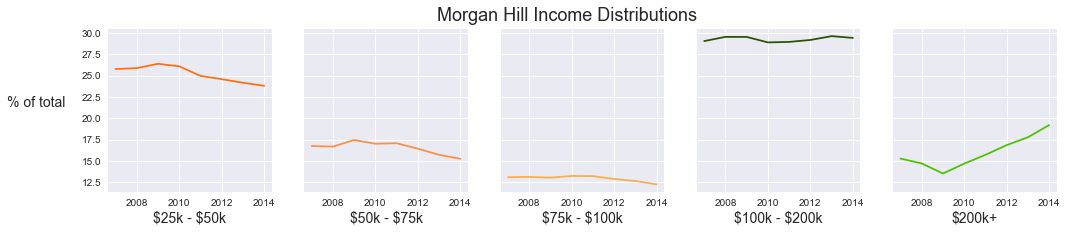

In [9]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5,figsize=(17,3),sharey=True)
ax1.plot([2007,2008,2009,2010,2011,2012,2013,2014],ca_tax_normalized.loc['95037'].loc['1: 25,000-50,000'],color='#ff6f0f')
ax1.set_ylabel('% of total', rotation=0,labelpad=45,fontsize=14)
ax1.set_xlabel('\$25k - \$50k',fontsize=14)
ax2.plot([2007,2008,2009,2010,2011,2012,2013,2014],ca_tax_normalized.loc['95037'].loc['2: 50,000-75,000'],color='#fc8f46')
ax2.set_xlabel('\$50k - \$75k',fontsize=14)
ax3.plot([2007,2008,2009,2010,2011,2012,2013,2014],ca_tax_normalized.loc['95037'].loc['3: 75,000-100,000'],color='#fcad46')
ax3.set_xlabel('\$75k - \$100k',fontsize=14)
ax4.plot([2007,2008,2009,2010,2011,2012,2013,2014],ca_tax_normalized.loc['95037'].loc['4: 100,000-200,000'],color='#285100')
ax4.set_xlabel('\$100k - \$200k',fontsize=14)
ax5.plot([2007,2008,2009,2010,2011,2012,2013,2014],ca_tax_normalized.loc['95037'].loc['5: > 200,000'],color='#4dc100')
ax5.set_xlabel('\$200k+',fontsize=14)

plt.suptitle('Morgan Hill Income Distributions',fontsize=18)

By splitting the income brackets and observing their changes over time, we get a better picture of the relative changes over time. We are looking for regions which show decreasing trends in the lower brackets and increasing trends in the higher brackets.

# Analysis of Significant Regions

We will now analyze regions with the most significant changes in income distribution, separated by general region within California.

In [10]:
ca_income_change = pd.DataFrame(columns=['zipcode','1: 25k-50k','2: 50k-75k','3: 75k-100k','4: 100k-200k','5: >200k'])

In [11]:
# create df representing changes in each income bracket from 2007 to 2014
for zc in zipcodes:
    first = ca_tax_normalized.loc[zc].loc['1: 25,000-50,000']['tax_returns_2014_%'] - ca_tax_normalized.loc[zc].loc['1: 25,000-50,000']['tax_returns_2007_%']
    second = ca_tax_normalized.loc[zc].loc['2: 50,000-75,000']['tax_returns_2014_%'] - ca_tax_normalized.loc[zc].loc['2: 50,000-75,000']['tax_returns_2007_%']
    third = ca_tax_normalized.loc[zc].loc['3: 75,000-100,000']['tax_returns_2014_%'] - ca_tax_normalized.loc[zc].loc['3: 75,000-100,000']['tax_returns_2007_%']
    fourth = ca_tax_normalized.loc[zc].loc['4: 100,000-200,000']['tax_returns_2014_%'] - ca_tax_normalized.loc[zc].loc['4: 100,000-200,000']['tax_returns_2007_%']
    fifth = ca_tax_normalized.loc[zc].loc['5: > 200,000']['tax_returns_2014_%'] - ca_tax_normalized.loc[zc].loc['5: > 200,000']['tax_returns_2007_%']
    temp = pd.DataFrame({'zipcode':[zc],'1: 25k-50k':[first],'2: 50k-75k':[second],'3: 75k-100k':[third],'4: 100k-200k':[fourth],'5: >200k':[fifth]})
    ca_income_change = ca_income_change.append(temp)

In [12]:
ca_income_change = ca_income_change.set_index('zipcode')

### Regions with greatest increase in \$200,000+ income bracket

In [13]:
ca_income_change.sort_values(by='5: >200k',ascending=False)[0:10]

,1: 25k-50k,2: 50k-75k,3: 75k-100k,4: 100k-200k,5: >200k
zipcode,,,,,
95054,-6.732233,-4.556195,-3.918435,1.568799,13.638064
94158,-15.199000,-0.602933,-1.933195,4.480113,13.255015
94041,-9.066897,-3.973534,-1.772384,1.954974,12.857841
94583,-4.437616,-3.428816,-2.418330,-2.526770,12.811533
92127,-4.656028,-2.887181,-3.753731,-1.260210,12.557149
94043,-6.188259,-4.313145,-3.046495,1.478459,12.069439
94105,-6.456098,-6.641844,-2.890544,4.086148,11.902337
95014,-2.451780,-2.875269,-2.970075,-3.547913,11.845036
94582,-1.834056,-1.129300,-2.322895,-6.524053,11.810304


### Regions with greatest increase in \$100,000 - \$200,000 income bracket

In [14]:
ca_income_change.sort_values(by='4: 100k-200k',ascending=False)[0:10]

,1: 25k-50k,2: 50k-75k,3: 75k-100k,4: 100k-200k,5: >200k
zipcode,,,,,
95306,-9.680207,-6.611927,5.747623,15.787957,-5.243446
95668,-5.913978,-4.569892,0.134409,15.591398,-5.241935
95942,-1.286716,-7.018932,-2.030269,15.097822,-4.761905
95549,-1.644245,-3.373906,-4.996797,14.499253,-4.484305
95456,1.033835,6.578947,-11.160714,12.922932,-9.375000
96120,-3.181189,-1.086742,-2.726734,11.973918,-4.979253
95113,-19.680465,-5.899298,5.122246,11.626725,8.830792
94567,-0.094340,8.773585,-15.566038,11.603774,-4.716981
95410,-4.301552,4.678492,-3.592018,11.507761,-8.292683


Note: all of the zipcodes in the above two tables are in Northern California, with the exception of 92127 (San Diego)

### Regions with greatest increase in \$75,000 - \$100,000 income bracket

In [15]:
ca_income_change.sort_values(by='3: 75k-100k',ascending=False)[0:10]

,1: 25k-50k,2: 50k-75k,3: 75k-100k,4: 100k-200k,5: >200k
zipcode,,,,,
95935,-0.898204,-11.505560,12.403764,0.000000,0.000000
92282,4.832837,-7.017544,8.474015,-6.289308,0.000000
92347,-5.782313,4.761905,8.163265,-7.142857,0.000000
93239,-0.775834,-6.916474,7.692308,0.000000,0.000000
93243,-5.403557,-1.727086,7.506840,-0.376197,0.000000
92257,1.175851,-0.052650,6.984907,-8.108108,0.000000
96039,-0.134348,4.120018,6.359158,-10.344828,0.000000
95306,-9.680207,-6.611927,5.747623,15.787957,-5.243446
92401,-0.024710,3.113417,5.361997,-8.450704,0.000000


### Regions with greatest \*decrease\* in \$25,000 - \$50,000 income bracket

In [16]:
ca_income_change.sort_values(by='1: 25k-50k')[0:10]

,1: 25k-50k,2: 50k-75k,3: 75k-100k,4: 100k-200k,5: >200k
zipcode,,,,,
95113,-19.680465,-5.899298,5.122246,11.626725,8.830792
93252,-18.146160,7.287366,0.701899,10.156895,0.000000
94158,-15.199000,-0.602933,-1.933195,4.480113,13.255015
94102,-14.881379,-2.048609,1.423381,9.886479,5.620128
94612,-14.350088,0.322974,3.578721,7.133139,3.315254
95811,-13.821578,3.797632,3.309643,4.451212,2.263091
90015,-13.548300,-1.071737,0.992879,8.106466,5.520693
90014,-12.887243,-2.251590,4.578429,7.973147,2.587256
96038,-12.669683,18.099548,-11.538462,6.108597,0.000000


In [17]:
ca_income_change.describe()

,1: 25k-50k,2: 50k-75k,3: 75k-100k,4: 100k-200k,5: >200k
count,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000
mean,-2.519798,-1.162828,-0.296748,2.400717,1.578657
std,2.762630,2.303142,1.845165,2.498066,2.598790
min,-19.680465,-11.505560,-15.566038,-11.086475,-12.843253
25%,-3.881004,-2.179749,-1.083145,1.159624,0.138309
50%,-2.384412,-1.325664,-0.302772,2.300287,0.957904
75%,-1.036127,-0.403232,0.540320,3.458442,2.576935
max,9.794344,27.094474,12.403764,15.787957,13.638064


# I. Northern California

## Santa Clara: 95054

In [18]:
ca_income_change[ca_income_change['5: >200k']==ca_income_change['5: >200k'].max()]

,1: 25k-50k,2: 50k-75k,3: 75k-100k,4: 100k-200k,5: >200k
zipcode,,,,,
95054,-6.732233,-4.556195,-3.918435,1.568799,13.638064


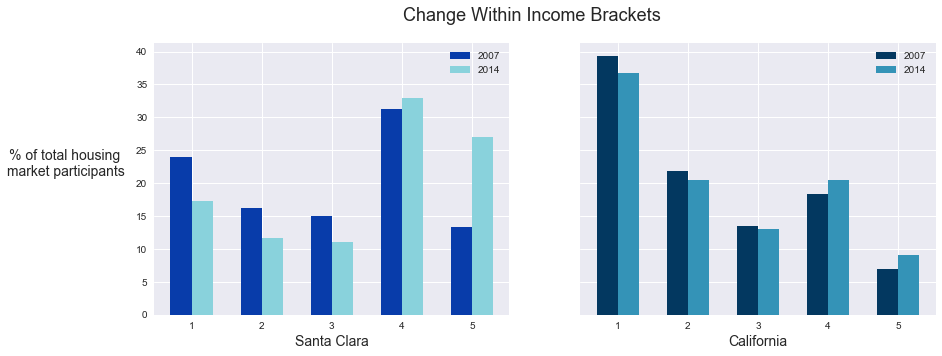

In [30]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(14,5))

ax1.bar([1-0.15,2-0.15,3-0.15,4-0.15,5-0.15],ca_tax_normalized.loc['95054']['tax_returns_2007_%'],width=0.3,facecolor='#083CAA')
ax1.bar([1+0.15,2+0.15,3+0.15,4+0.15,5+0.15],ca_tax_normalized.loc['95054']['tax_returns_2014_%'],width=0.3,facecolor='#89D2DC')
ax1.set_ylabel('% of total housing \nmarket participants',rotation=0,labelpad=70,fontsize=14)
ax1.set_xlabel('Santa Clara',fontsize=14)
ax1.legend(['2007','2014'])

ax2.bar([1-0.15,2-0.15,3-0.15,4-0.15,5-0.15],ca_tax_normalized.loc['0']['tax_returns_2007_%'],width=0.3,facecolor='#033860')
ax2.bar([1+0.15,2+0.15,3+0.15,4+0.15,5+0.15],ca_tax_normalized.loc['0']['tax_returns_2014_%'],width=0.3,facecolor='#3493B7')
ax2.set_xlabel('California',fontsize=14)
ax2.legend(['2007','2014'])

plt.suptitle('Change Within Income Brackets', fontsize=18)

Compared to the change in earnings of all Californians, Santa Clara has a much greater increase in the \$200,000+ income bracket from 2007 to 2014 and a noticeably greater decrease in each of the three lower income brackets. The change is unlikely to be the result of prior residents increasing their earning potential. (The result of such a change would be less stark. In particular, the middle brackets would not noticeably decrease: earners from the bracket below them would enter the middle brackets. Additionally, the highest bracket would not increase by the large amount we observe here.)

It is more reasonable to think that the change was a result of the immigration of high-earners into Santa Clara. That is, an underlying change in the industries and available employment opportunities attracted a different demographic. This is causing a change in the population itself, rather than a change in the earnings of the original population.

Although this is a significant shift in income density, we must be wary that these trends are unlikely to continue. 

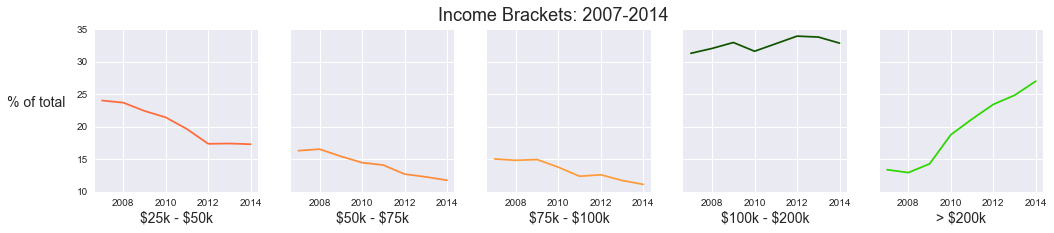

In [32]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5,figsize=(17,3),sharey=True)
ax1.plot([2007,2008,2009,2010,2011,2012,2013,2014],ca_tax_normalized.loc['95054'].loc['1: 25,000-50,000'],color='#ff6b3a')
ax1.set_ylabel('% of total',rotation=0,labelpad=40,fontsize=14)
ax1.set_xlabel('\$25k - \$50k',fontsize=14)
ax2.plot([2007,2008,2009,2010,2011,2012,2013,2014],ca_tax_normalized.loc['95054'].loc['2: 50,000-75,000'],color='#ff8c39')
ax2.set_xlabel('\$50k - \$75k',fontsize=14)
ax3.plot([2007,2008,2009,2010,2011,2012,2013,2014],ca_tax_normalized.loc['95054'].loc['3: 75,000-100,000'],color='#ff9b38')
ax3.set_xlabel('\$75k - \$100k',fontsize=14)
ax4.plot([2007,2008,2009,2010,2011,2012,2013,2014],ca_tax_normalized.loc['95054'].loc['4: 100,000-200,000'],color='#115400')
ax4.set_xlabel('\$100k - \$200k',fontsize=14)
ax5.plot([2007,2008,2009,2010,2011,2012,2013,2014],ca_tax_normalized.loc['95054'].loc['5: > 200,000'],color='#2dd600')
ax5.set_xlabel('> \$200k',fontsize=14)

plt.suptitle('Income Brackets: 2007-2014',fontsize=18)

Note: for this investment analysis, the positions of the different plots relative to each other is not of primary significance. What we are interested in is the relative change within each plot. In particular, the lower income brackets are decreasing over time, whereas the higher income brackets are increasing over time (for Santa Clara, this is especially true in the highest bracket).

Notice here, by 2014 there were significantly more people earning greater than \$200,000 than people earning between \$25,000 - \$50,000. This was not true in 2007; this reversal indicates a significant change in Santa Clara's population. 

## Downtown San Jose: 95113

In [21]:
ca_income_change[ca_income_change['1: 25k-50k']==ca_income_change['1: 25k-50k'].min()]

,1: 25k-50k,2: 50k-75k,3: 75k-100k,4: 100k-200k,5: >200k
zipcode,,,,,
95113,-19.680465,-5.899298,5.122246,11.626725,8.830792


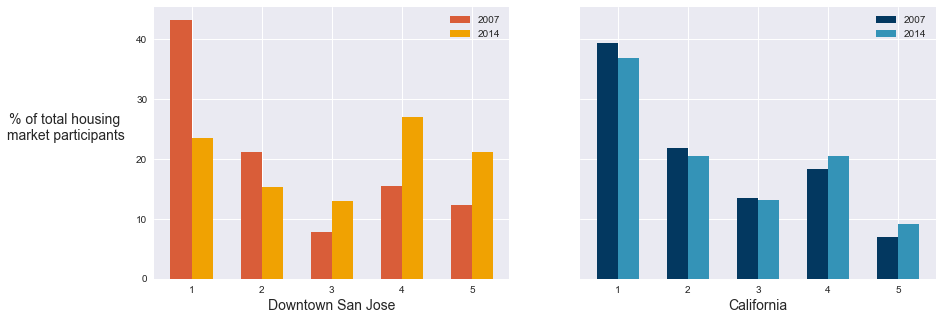

In [22]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(14,5))

ax1.bar([1-0.15,2-0.15,3-0.15,4-0.15,5-0.15],ca_tax_normalized.loc['95113']['tax_returns_2007_%'],width=0.3,facecolor='#D95D39')
ax1.bar([1+0.15,2+0.15,3+0.15,4+0.15,5+0.15],ca_tax_normalized.loc['95113']['tax_returns_2014_%'],width=0.3,facecolor='#F0A202')
ax1.set_ylabel('% of total housing \nmarket participants',rotation=0,labelpad=70,fontsize=14)
ax1.set_xlabel('Downtown San Jose',fontsize=14)
ax1.legend(['2007','2014'])

ax2.bar([1-0.15,2-0.15,3-0.15,4-0.15,5-0.15],ca_tax_normalized.loc['0']['tax_returns_2007_%'],width=0.3,facecolor='#033860')
ax2.bar([1+0.15,2+0.15,3+0.15,4+0.15,5+0.15],ca_tax_normalized.loc['0']['tax_returns_2014_%'],width=0.3,facecolor='#3493B7')
ax2.set_xlabel('California',fontsize=14)
ax2.legend(['2007','2014'])

There is a steep drop in the proportion of earners in the lowest income bracket between 2007 and 2014 as well as a notable drop in the second to lowest income bracket. All three of the highest brackets in Downtown San Jose have a significant increase when we compare the changing levels to those in all of California. Although not as dramatic of an increase as the highest bracket in Santa Clara, this signals a strong and stable shift in income distribution across all of the higher brackets.

Note: urban regions (i.e. 'downtown') have sparse opportunities for housing investment. The opportunity here may exist in owning a residential complex for lease and charging a higher rent. 

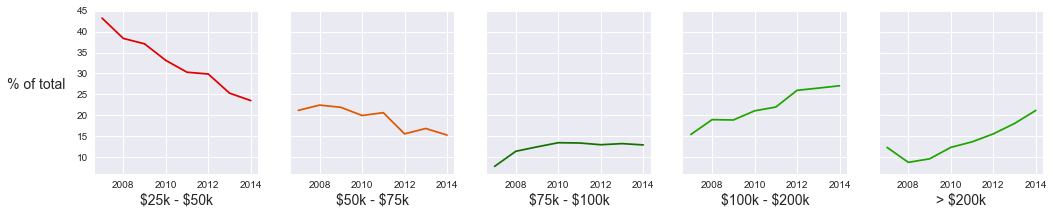

In [23]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5,figsize=(17,3),sharey=True)
ax1.plot([2007,2008,2009,2010,2011,2012,2013,2014],ca_tax_normalized.loc['95113'].loc['1: 25,000-50,000'],color='#e00000')
ax1.set_ylabel('% of total',rotation=0,labelpad=40,fontsize=14)
ax1.set_xlabel('\$25k - \$50k',fontsize=14)
ax2.plot([2007,2008,2009,2010,2011,2012,2013,2014],ca_tax_normalized.loc['95113'].loc['2: 50,000-75,000'],color='#e05900')
ax2.set_xlabel('\$50k - \$75k',fontsize=14)
ax3.plot([2007,2008,2009,2010,2011,2012,2013,2014],ca_tax_normalized.loc['95113'].loc['3: 75,000-100,000'],color='#167200')
ax3.set_xlabel('\$75k - \$100k',fontsize=14)
ax4.plot([2007,2008,2009,2010,2011,2012,2013,2014],ca_tax_normalized.loc['95113'].loc['4: 100,000-200,000'],color='#1fa500')
ax4.set_xlabel('\$100k - \$200k',fontsize=14)
ax5.plot([2007,2008,2009,2010,2011,2012,2013,2014],ca_tax_normalized.loc['95113'].loc['5: > 200,000'],color='#1fa500')
ax5.set_xlabel('> \$200k',fontsize=14)


# II. Southern Calfornia

## San Diego: 92127

In [24]:
ca_income_change.reset_index()[ca_income_change.reset_index()['zipcode']=='92127'].set_index('zipcode')

,1: 25k-50k,2: 50k-75k,3: 75k-100k,4: 100k-200k,5: >200k
zipcode,,,,,
92127,-4.656028,-2.887181,-3.753731,-1.26021,12.557149


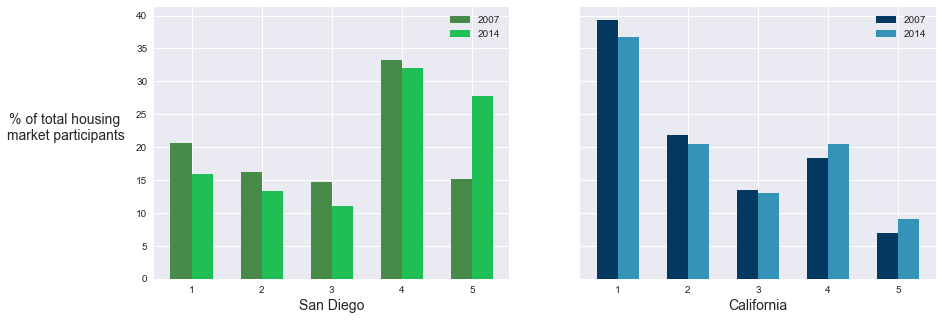

In [25]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(14,5))

ax1.bar([1-0.15,2-0.15,3-0.15,4-0.15,5-0.15],ca_tax_normalized.loc['92127']['tax_returns_2007_%'],width=0.3,facecolor='#488B49')
ax1.bar([1+0.15,2+0.15,3+0.15,4+0.15,5+0.15],ca_tax_normalized.loc['92127']['tax_returns_2014_%'],width=0.3,facecolor='#20BF55')
ax1.set_ylabel('% of total housing \nmarket participants',rotation=0,labelpad=70,fontsize=14)
ax1.set_xlabel('San Diego',fontsize=14)
ax1.legend(['2007','2014'])

ax2.bar([1-0.15,2-0.15,3-0.15,4-0.15,5-0.15],ca_tax_normalized.loc['0']['tax_returns_2007_%'],width=0.3,facecolor='#033860')
ax2.bar([1+0.15,2+0.15,3+0.15,4+0.15,5+0.15],ca_tax_normalized.loc['0']['tax_returns_2014_%'],width=0.3,facecolor='#3493B7')
ax2.set_xlabel('California',fontsize=14)
ax2.legend(['2007','2014'])

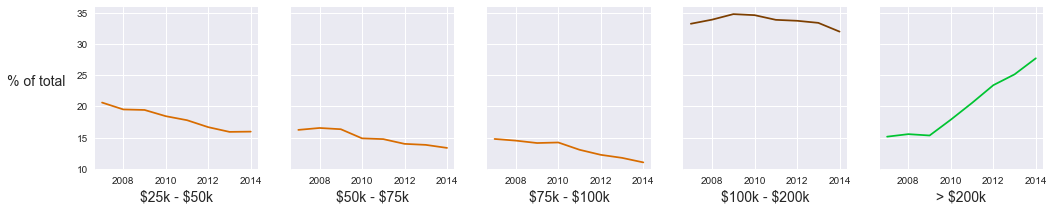

In [26]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5,figsize=(17,3),sharey=True)
ax1.plot([2007,2008,2009,2010,2011,2012,2013,2014],ca_tax_normalized.loc['92127'].loc['1: 25,000-50,000'],color='#d86c00')
ax1.set_ylabel('% of total',rotation=0,labelpad=40,fontsize=14)
ax1.set_xlabel('\$25k - \$50k',fontsize=14)
ax2.plot([2007,2008,2009,2010,2011,2012,2013,2014],ca_tax_normalized.loc['92127'].loc['2: 50,000-75,000'],color='#d86c00')
ax2.set_xlabel('\$50k - \$75k',fontsize=14)
ax3.plot([2007,2008,2009,2010,2011,2012,2013,2014],ca_tax_normalized.loc['92127'].loc['3: 75,000-100,000'],color='#d86c00')
ax3.set_xlabel('\$75k - \$100k',fontsize=14)
ax4.plot([2007,2008,2009,2010,2011,2012,2013,2014],ca_tax_normalized.loc['92127'].loc['4: 100,000-200,000'],color='#7c3e00')
ax4.set_xlabel('\$100k - \$200k',fontsize=14)
ax5.plot([2007,2008,2009,2010,2011,2012,2013,2014],ca_tax_normalized.loc['92127'].loc['5: > 200,000'],color='#00c431')
ax5.set_xlabel('> \$200k',fontsize=14)

## Downtown Los Angeles: 90015

In [27]:
ca_income_change.reset_index()[ca_income_change.reset_index()['zipcode']=='90015'].set_index('zipcode')

,1: 25k-50k,2: 50k-75k,3: 75k-100k,4: 100k-200k,5: >200k
zipcode,,,,,
90015,-13.5483,-1.071737,0.992879,8.106466,5.520693


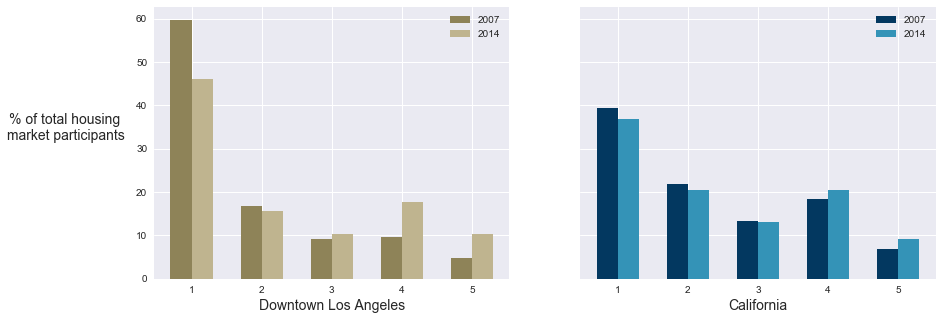

In [28]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(14,5))

ax1.bar([1-0.15,2-0.15,3-0.15,4-0.15,5-0.15],ca_tax_normalized.loc['90015']['tax_returns_2007_%'],width=0.3,facecolor='#8E8358')
ax1.bar([1+0.15,2+0.15,3+0.15,4+0.15,5+0.15],ca_tax_normalized.loc['90015']['tax_returns_2014_%'],width=0.3,facecolor='#BFB48F')
ax1.set_ylabel('% of total housing \nmarket participants',rotation=0,labelpad=70,fontsize=14)
ax1.set_xlabel('Downtown Los Angeles',fontsize=14)
ax1.legend(['2007','2014'])

ax2.bar([1-0.15,2-0.15,3-0.15,4-0.15,5-0.15],ca_tax_normalized.loc['0']['tax_returns_2007_%'],width=0.3,facecolor='#033860')
ax2.bar([1+0.15,2+0.15,3+0.15,4+0.15,5+0.15],ca_tax_normalized.loc['0']['tax_returns_2014_%'],width=0.3,facecolor='#3493B7')
ax2.set_xlabel('California',fontsize=14)
ax2.legend(['2007','2014'])

The shift in income distribution is less noticeable here because it is spread out over all of the higher income brackets and the plot scales up to the 60% level, but we can observe a significant decrease in the lower income brackets (especially the lowest income bracket: -15%). Again, there is not as dramatic of an increase in a single bracket as we observed in Santa Clara, but a steady increase over all the higher brackets signals a more stable growth pattern.

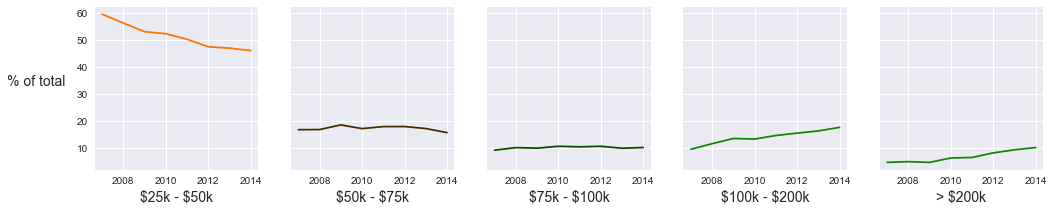

In [29]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5,figsize=(17,3),sharey=True)
ax1.plot([2007,2008,2009,2010,2011,2012,2013,2014],ca_tax_normalized.loc['90015'].loc['1: 25,000-50,000'],color='#ff7200')
ax1.set_ylabel('% of total',rotation=0,labelpad=40,fontsize=14)
ax1.set_xlabel('\$25k - \$50k',fontsize=14)
ax2.plot([2007,2008,2009,2010,2011,2012,2013,2014],ca_tax_normalized.loc['90015'].loc['2: 50,000-75,000'],color='#442b00')
ax2.set_xlabel('\$50k - \$75k',fontsize=14)
ax3.plot([2007,2008,2009,2010,2011,2012,2013,2014],ca_tax_normalized.loc['90015'].loc['3: 75,000-100,000'],color='#084900')
ax3.set_xlabel('\$75k - \$100k',fontsize=14)
ax4.plot([2007,2008,2009,2010,2011,2012,2013,2014],ca_tax_normalized.loc['90015'].loc['4: 100,000-200,000'],color='#0f8400')
ax4.set_xlabel('\$100k - \$200k',fontsize=14)
ax5.plot([2007,2008,2009,2010,2011,2012,2013,2014],ca_tax_normalized.loc['90015'].loc['5: > 200,000'],color='#0f8400')
ax5.set_xlabel('> \$200k',fontsize=14)

The greatest relative changes occur in the \$25k - \$50k and \$100k - \$200k brackets. Although not the highest bracket, the latter contains incomes which are certainly higher than average. This signals a trend in DTLA's population towards higher earners. This gradual growth is likely the most sustainable within all of the regions we have observed.

# Postscript
We will study the behavior of the housing market in these regions as confirmation of our analysis.

We have not answered questions of forecasting in depth here; we will consider our analysis as descriptive of the housing market (from 2007-2017) rather than predictive (from 2014-onwards). Thus, by comparing the market in these regions to California's overall market, we can argue if our analysis of shifting income distribution can be used as an indicator for the housing market.

## California

From April 2007 to April 2017, the average Californian home lost value (as measured by Zillow's Home Value Index).

  * April 2007: California Home Value Index valued at \$513,000
  * April 2017: California Home Value Inded valued at \$495,000
  * \-3.51%
  
Source: https://www.zillow.com/ca/home-values/

## Santa Clara: 95054

  * April 2007: 95054 Home Value Index valued at \$722,000
  * April 2017: 95054 Home Value Inded valued at \$1,020,000
  * \+41.3%
  
Source: https://www.zillow.com/santa-clara-ca-95054/home-values/

## Downtown San Jose: 95113

No Data is available. This is an urban region without many housing units on the market.

### East San Jose: 95148

This region is adjacent to Downtown San Jose and should exhibit similar behavior to what we would expect if there were market data available in Downtown San Jose.

  * April 2007: 95148 Home Value Index valued at \$770,000
  * April 2017: 95148 Home Value Inded valued at \$850,000
  * \+10.4%
  
Source: https://www.zillow.com/san-jose-ca-95148/home-values/

## San Diego: 92127 


  * April 2007: 92127 Home Value Index valued at \$660,000
  * April 2017: 92127 Home Value Inded valued at \$778,000
  * \+17.9%
  
Source: https://www.zillow.com/san-diego-ca-92127/home-values/

## Downtown Los Angeles: 90015


  * April 2007: 90015 Home Value Index valued at \$536,000
  * April 2017: 90015 Home Value Inded valued at \$678,000
  * \+26.5%

Source: https://www.zillow.com/los-angeles-ca-90015/home-values/

## Concluding Remarks

1. All of the significant regions we extracted and listed significantly out-performed California's market average as measured by increasing value in Zillow's Home Price Index. This is strong supporting evidence that our approach to analyzing shifting income distribution will indicate where real estate value will appreciate the most.

2. For the sake of investment, however, we must delve deeper into questions of forecasting to predict where we can find these shifts in income distribution in the future. Then, via the correlation we have established here, identifying a region with a future shift in income distribution will likely imply that we have identified a region with strong potential growth in real estate value.

3. From the standpoint of the homebuyer, our analysis begs the question: is it worth moving to Northern California for a higher-paying job? For many, the answer will be no.